In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [14]:
def HC(f, init, nbr, its, stop=None):
    """
    f: objective function X -> R (where X is the search space)
    init: function giving random element of X
    nbr: function X -> X which gives a neighbour of the input x
    its: number of iterations, ie fitness evaluation budget
    stop: termination criterion (X, R) -> bool
    return: best ever x
    
    In this version, we store and return a history of
    best objective values; we avoid wasting objective evaluations;
    we allow a termination criterion.
    """
    history = [] # create history
    x = init()
    fx = f(x) # fx stores f of current best point
    for i in range(its):
        xnew = nbr(x)
        fxnew = f(xnew) # avoid re-calculating f
        if fxnew > fx: # we maximise, not minimise
            x = xnew
            fx = fxnew 
        history.append((i, fx)) # save history
        if stop is not None and stop(x, fx): # a termination condition
            break
    return x, np.array(history) # return history

In [15]:
# operators for bitstrings
def bitstring_init(n):
    # uniform sampling from X
    return [random.randrange(2) for i in range(n)]

In [16]:
def bitstring_nbr(x):
    # "blind mutation" -- does not assume anything about the
    # objective, eg we do not know that 1s are good and 0s bad.
    x = x.copy() # otherwise we would change x itself
    i = random.randrange(len(x))
    x[i] = 1 - x[i]
    return x

In [7]:
onemax = sum

bestx = HC(f=onemax,
           init = lambda: bitstring_init(10),
           nbr = bitstring_nbr,
           its = 100)

# Q3. optimise the "onemax" function

In [71]:
def run_onemax_and_plot():
    # Q3. optimise the "onemax" function
    n = 8
    onemax = sum # a common (easy) test problem
    onemax_stop = lambda x, fx: fx == len(x)
    x, history = HC(onemax,
                            lambda: bitstring_init(n),
                            bitstring_nbr,
                            its=100,
                            stop=onemax_stop
                   )
    
    plt.plot(history[:, 0], history[:, 1])
    plt.xlabel("Iteration"); plt.ylabel("Objective");
    plt.savefig("HC_plot.pdf")
    #plt.close()

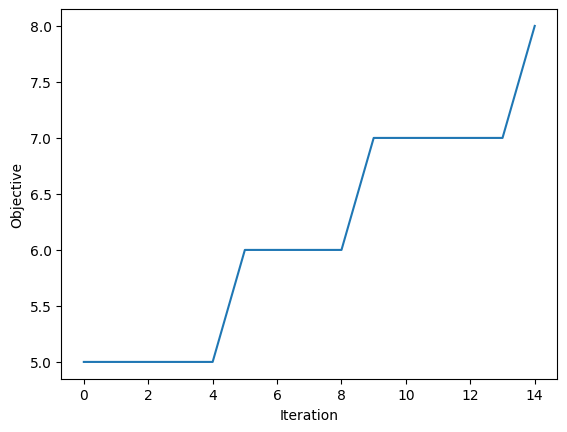

In [72]:
run_onemax_and_plot()

# 04. test HC scalability on onemax

In [45]:
def run_onemax_and_test_scalability():
    # 04. test HC scalability on onemax
    ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    its = 2000
    bestfxs = []
    onemax = sum
    onemax_stop = lambda x, fx: fx == len(x)
    
    for n in ns:
        x, history = HC(onemax,
                        lambda: bitstring_init(n),
                        bitstring_nbr,
                        its = its,
                        stop = onemax_stop)
        
        bestfx = history[-1, 1]
        bestfxs.append((n, bestfx))
    
    bestfxs = np.array(bestfxs)
    
    plt.plot(bestfxs[:, 0], bestfxs[:, 1])
    plt.xlabel("Size")
    plt.ylabel("Objectives");
    plt.savefig("HC_scalability_plot.pdf")

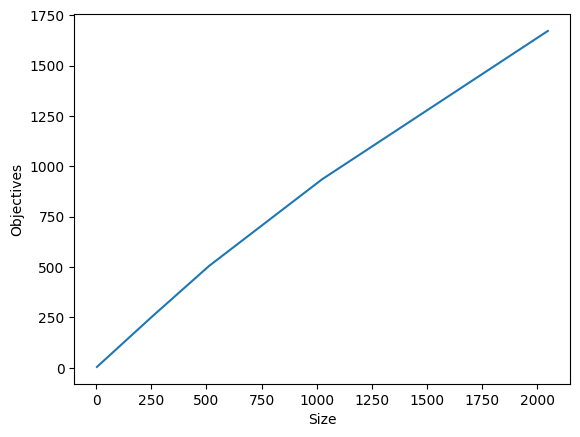

In [46]:
run_onemax_and_test_scalability()

In [39]:
def real_init(n):
    return np.random.random(n)

In [40]:
def real_nbr(x):
    delta = 0.3
    x = x.copy()
    i = random.randrange(len(x))
    x[i] = x[i] + (2 * delta * np.random.random()) - delta
    
    return x

In [41]:
def sphere(x):
    return np.sum(x**2)

In [42]:
def rastrigin(x):
    func = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)
    return func(x)

# Q5

In [67]:
def run_sphere():
    #n = 2
    ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    its = 2000
    
    #f = lambda x: -sphere(x)
    f = lambda x: -rastrigin(x)
    stop = lambda i, fx: abs(fx) < 0.00001
    bestfxs = []
    
    # plt.plot(history[:, 0], history[:, 1])
    # plt.xlabel("Iteration"); plt.ylabel("Objective");
    # plt.savefig("HC_plot.pdf")
    # #plt.close()
    
    for n in ns:
        x, history = HC(f, lambda:real_init(n), real_nbr, its=1000, stop=stop)
        
        bestfx = history[-1, 1]
        bestfxs.append((n, bestfx))
    
    bestfxs = np.array(bestfxs)
    
    plt.plot(bestfxs[:, 0], bestfxs[:, 1])
    plt.xlabel("Size")
    plt.ylabel("Objectives");
    plt.savefig("HC_scalability_plot.pdf")

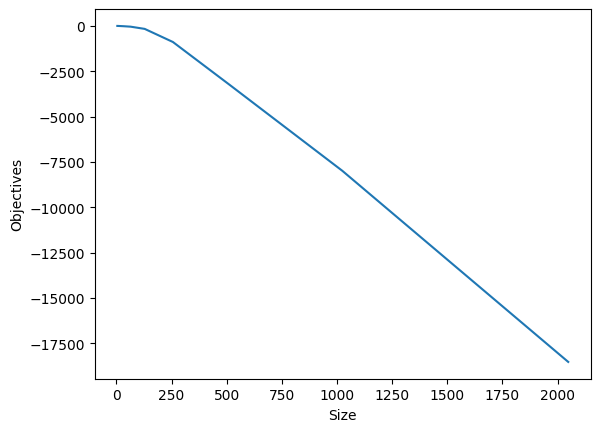

In [68]:
run_sphere()

# Q7

In [48]:
# some hard objectives on bitstrings, real vectors, and more generally

def needle_in_haystack(x):
    # this is a "needle in haystack":
    # the optimum is [1, 1, 1, .., 1],
    # with objective value 1, and every other point has objective 0
    f = 1
    for xi in x:
        f += xi
        
    return f

In [118]:
def needle_in_haystack2(x):
    if sum(x) == len(x): return 1
    else: return 0

In [73]:
def stochastic(x):
    # this is a fully stochastic objective -- impossible tp optimise
    # it is "cheating" for 07 because there is no real dependency
    return random.random()

In [74]:
def medium_difficulty(x):
    # this is more difficult than onemax, because there are some
    # interactions between decision variables
    # onemax has no interactions, in fact it is linear
    # but not as difficult as the needle in a haystack
    # the optimum is [1, 1, 1,...] with the objective value n-1.
    
    x1 = x[1:] # all but the first element
    x2 = x[:-1] # all but the last element
    f = sum(x1i * x2i for x1i, x2i in zip(x1, x2))
    
    return f

In [75]:
def constant_obj(x):
    return 1 # easy: every point is a global optimum

In [76]:
def hash_obj(x):
    # this will be as noisy as it gets. but we have to convert x
    # to be a hashable type. This will work if x is a list of 1s and 0s
    return hash("".join(map(str, x)))

In [170]:
x = bitstring_init(16)
x

[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]

In [173]:
hash_obj(x)

6999007750795796343

In [183]:
def if_obj(x):
    # it is small but illustrates dependency
    if x[1]: return x[0]
    else: return not x[0]

In [184]:
and_obj(x)

0

In [185]:
not x[0]

True

In [187]:
def guessing_game():
    """During undergrad, you probably programmed a guessing game where the
    computer thinks of a number and the human tries to guess it. It's
    a common exercise, eg:
    https://www.geeksforgeeks.org/number-guessing-game-in-python/.
    Here, instead, the human thinks of a bitstring and the computer
    tries to guess it."""
    print("Think of a bitstring and I will guess. Press Ctrl-D to stop.")
    f = lambda x: float(input(f"Here is my guess: {x}. How many are right? "))
    HC(f, lambda: bitstring_init(8), bitstring_nbr, its=20,
       stop=lambda x, fx: fx == len(x))

In [188]:
guessing_game()

Think of a bitstring and I will guess. Press Ctrl-D to stop.


KeyboardInterrupt: Interrupted by user